In [1]:
from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from netCDF4 import Dataset

import numpy as np

import os 

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import TransportTools_MITgcm as trt

In [3]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('notebook')

In [4]:
filename1a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run17/stateGlob.nc'
StateOuta = Dataset(filename1a)


filename2a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run17/gridGlob.nc'
GridOuta = Dataset(filename2a)


filename3a='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run17/ptracersGlob.nc'
PtracersOuta = Dataset(filename3a)

In [5]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = StateOuta.variables['Z']
#print(z[10])
Time = StateOuta.variables['T']
#print(Time[:])
xc = rout.getField(filename2a, 'XC') # x coords tracer cells
yc = rout.getField(filename2a, 'YC') # y coords tracer cells

bathy = rout.getField(filename2a, 'Depth')

In [7]:
Tempa = rout.getField(filename1a,'Temp')
#Salta = rout.getField(filename1a,'S')
Tr01 = rout.getField(filename3a,'Tr1')
MaskC = rout.getMask(filename2a,'HFacC') # same for both runs

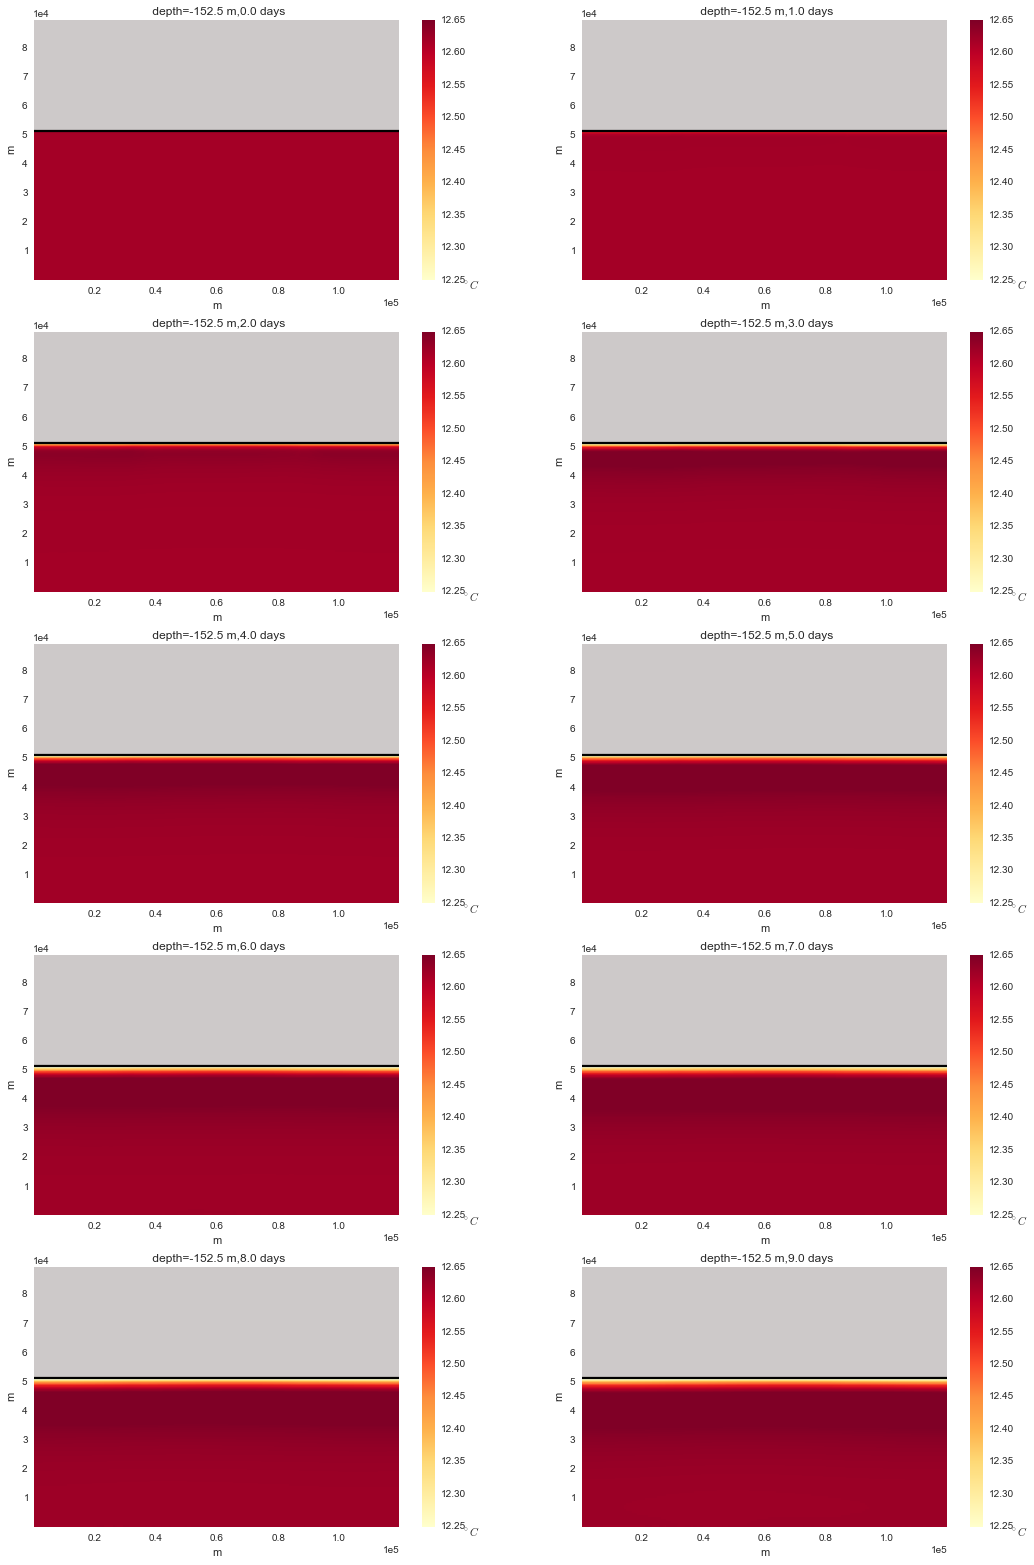

In [12]:
zlev=30

fig45=plt.figure(figsize=(18,27))

kk=1

for tt in range(0,nt,2):
    
    plt.subplot(5,2,kk)
    ax = plt.gca()
    
    CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
    ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    TempMaska=np.ma.array(Tempa[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    
    plt.pcolor(xc,yc,TempMaska,cmap='YlOrRd')
    
    pl.clim([12.25,12.65])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
    plt.xlabel('m')
    plt.ylabel('m')
        
    cb = plt.colorbar()
        
    cb.set_label('$^{\circ}C$',position=(1, 0),rotation=0)
       
    plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
    kk=kk+1

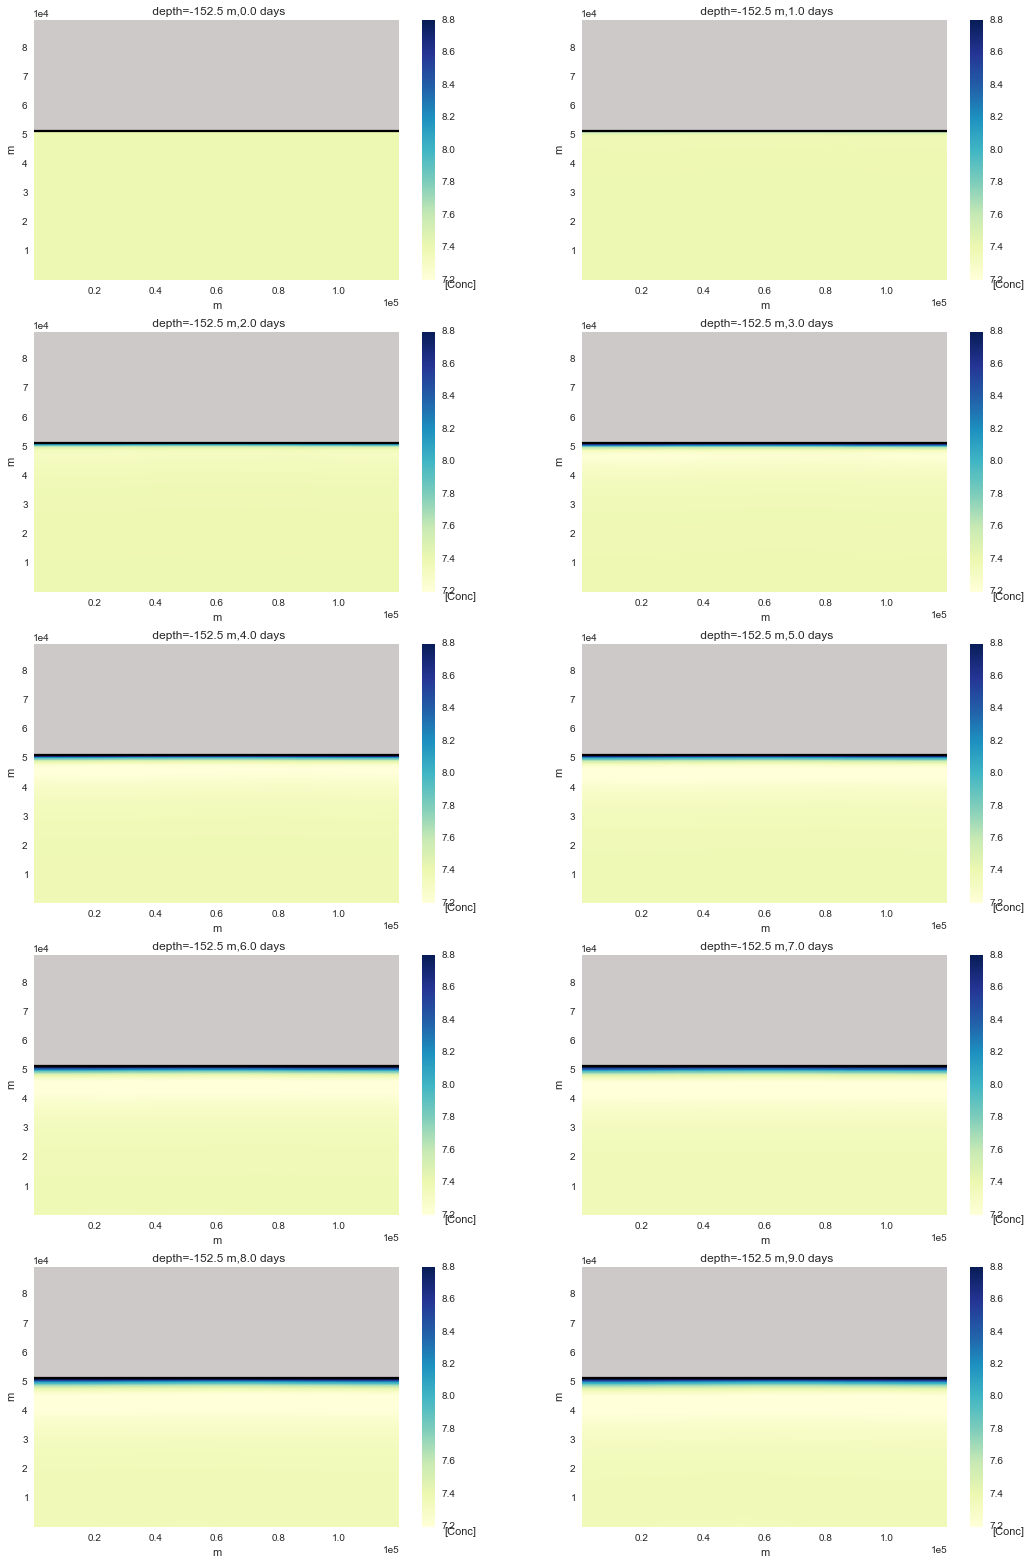

In [15]:
zlev=30

fig45=plt.figure(figsize=(18,27))

kk=1


for tt in range(0,nt,2):
    
    plt.subplot(5,2,kk)
    ax = plt.gca()
    
    CS = plt.contour(xc,yc,bathy,[150],colors='k',linewidths=[2.25] )
    ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
    Tr01Mask=np.ma.array(Tr01[tt,zlev,:,:],mask=MaskC[zlev,:,:])
    
    plt.pcolor(xc,yc,Tr01Mask,cmap='YlGnBu')
    
    pl.clim([7.2,8.8])
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        
    plt.xlabel('m')
    plt.ylabel('m')
        
    cb = plt.colorbar()
        
    cb.set_label('[Conc]',position=(1, 0),rotation=0)
       
    plt.title(" depth=%1.1f m,%1.1f days " % (z[zlev],tt/2.))
        
    kk=kk+1

52100.0


/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


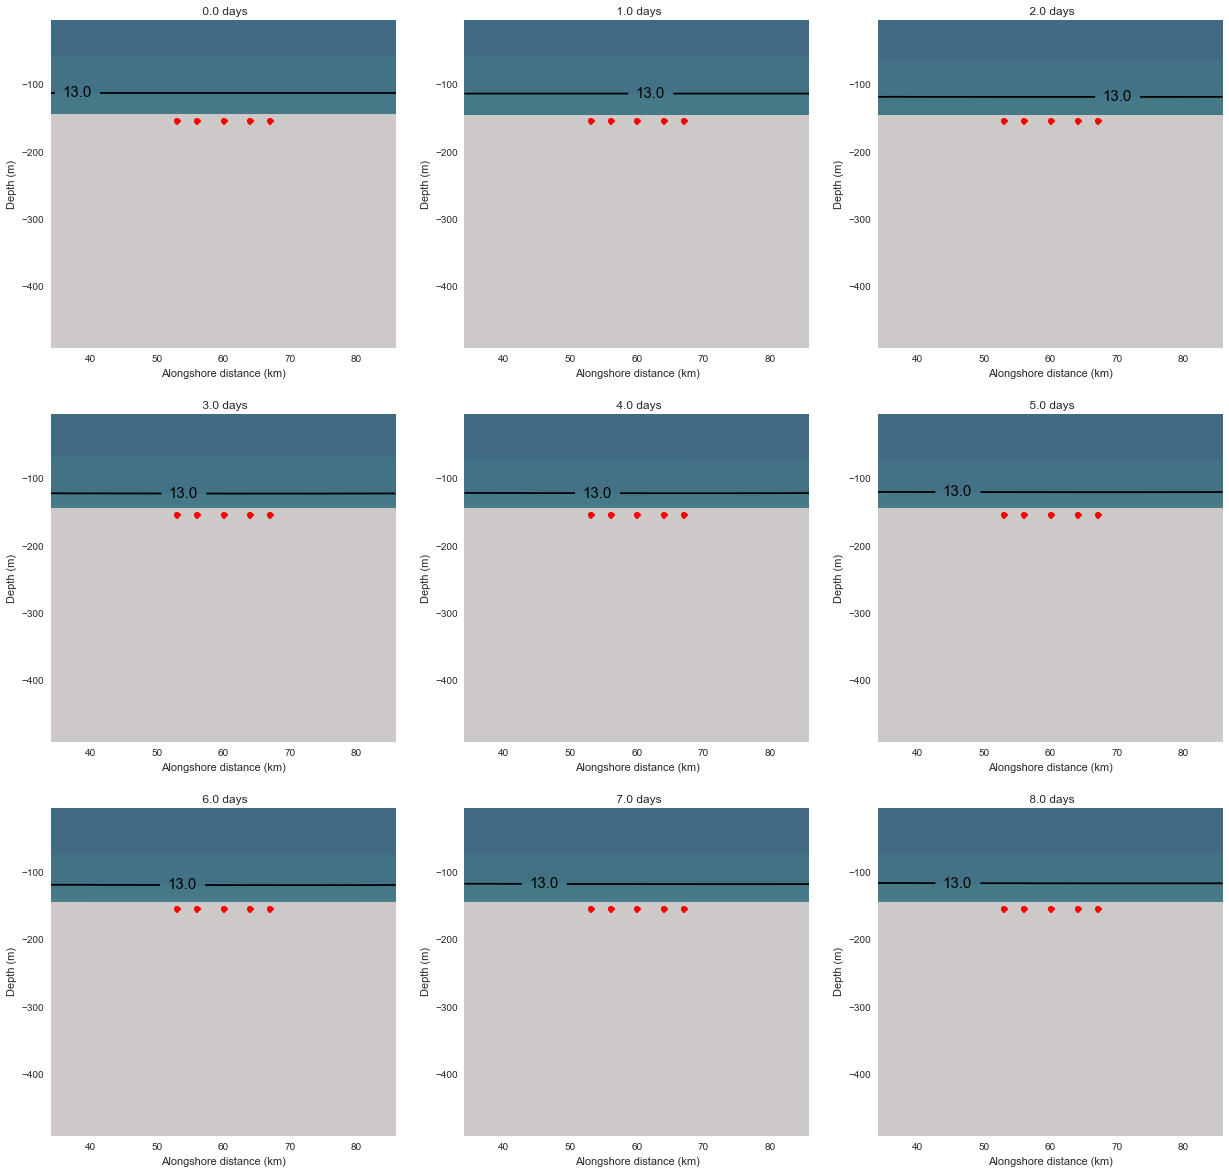

In [16]:
sns.set_style('dark')
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

pal = sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        TempMaska=np.ma.array(Tempa[tt,:,:,:],mask=MaskC[:,:,:])
    
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        levels=np.arange(2,20,0.5)
        CS=plt.contourf(xc[200,50:-50],z[:-35],TempMaska[:-35,200,50:-50],levels,cmap=pal)
        #cb = plt.colorbar()
        #plt.clim([9, 14])
        
        CS2 = plt.contour(CS, levels=CS.levels[::2],
                        colors = 'k',
                        hold='on')
        plt.clabel(CS2, fmt = '%2.1f', colors = 'k')
        
        plt.plot(xc[200,200],z[30],'ro')
        plt.plot(xc[200,160],z[30],'ro')
        plt.plot(xc[200,180],z[30],'ro')
        plt.plot(xc[200,215],z[30],'ro')
        plt.plot(xc[200,145],z[30],'ro')
        
        
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('[$^{\circ}$C]', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(yc[200,0]) 


52100.0


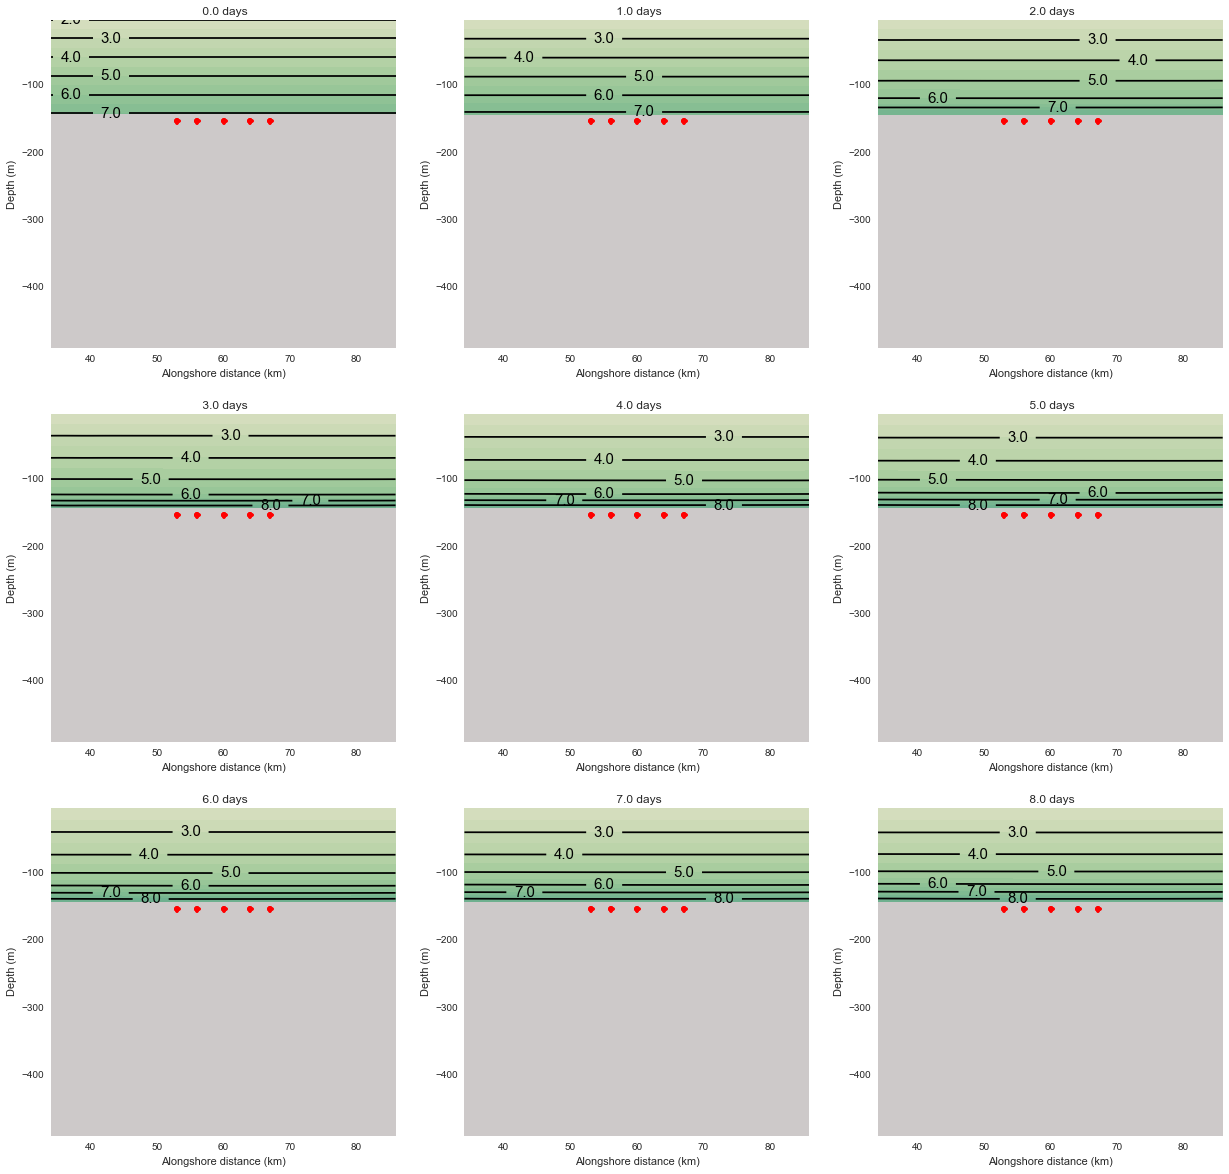

In [17]:
sns.set_style('dark')
plt.rcParams.update({'font.size':15})

kk=1

fig45=plt.figure(figsize=(21,20))

pal = sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)

for tt in range(0,18,2) :
        
        ### Upstream speed 
        
        plt.subplot(3,3,kk)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        Tr01Mask=np.ma.array(Tr01[tt,:,:,:],mask=MaskC[:,:,:])
    
        #Trmask=np.ma.array(temp[tt,:,:,:],mask=MASKhFacC[:,:,:])
        #fig1=plt.pcolor(xc[190,50:-50],z[:-30],Trmask[:-30,190,50:-50],cmap='rainbow')
        levels=np.arange(2,20,0.5)
        CS=plt.contourf(xc[200,50:-50],z[:-35],Tr01Mask[:-35,200,50:-50],levels,cmap=pal)
        #cb = plt.colorbar()
        #plt.clim([9, 14])
        
        CS2 = plt.contour(CS, levels=CS.levels[::2],
                        colors = 'k',
                        hold='on')
        plt.clabel(CS2, fmt = '%2.1f', colors = 'k')
        
        plt.plot(xc[200,200],z[30],'ro')
        plt.plot(xc[200,160],z[30],'ro')
        plt.plot(xc[200,180],z[30],'ro')
        plt.plot(xc[200,215],z[30],'ro')
        plt.plot(xc[200,145],z[30],'ro')
        
        
        plt.ylabel('Depth (m)')
        plt.xlabel('Alongshore distance (km)')
        cb.set_label('[C]', position=(1, 0),rotation=0)
        labels = [40, 50, 60, 70, 80]
        plt.xticks([40000,50000,60000,70000,80000], labels)
        plt.title(" %1.1f days " % (tt/2.))
       
            
        kk=kk+1
print(yc[200,0]) 
